<a href="https://colab.research.google.com/github/lpaolariosm/Ecuaciones-Diferenciales-Parciales-I/blob/main/Membrana_Vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:red;">Ejercicio:</span>
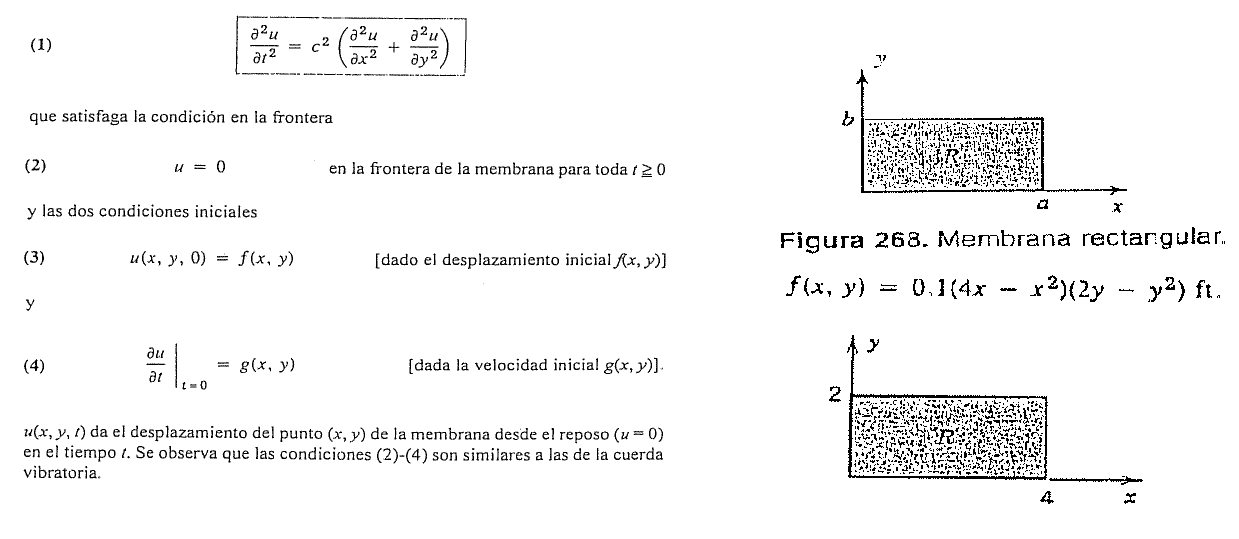

1.  Planteamiento del Problema
La ecuación de onda esta dada por

<span style="color:blue;">## Ecuación de la membrana bidimensional</span>

Queremos encontrar una función $ u(x, y, t) $ tal que:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) \tag{1}
$$
que satisfaga la condición en la frontera:

$$
u = 0 \quad \text{en la frontera de la membrana para toda } t \geq 0 \tag{2}
$$
y las dos condiciones iniciales:

$
u(x, y, 0) = f(x, y) \quad \text{[dado el desplazamiento inicial } f(x, y) \text{]} \tag{3}
$

$
\left. \frac{\partial u}{\partial t} \right|_{t=0} = g(x, y) \quad \text{[dada la velocidad inicial } g(x, y) \text{]} \tag{4}
$

---

$ u(x, y, t) $ da el desplazamiento del punto $(x, y) $ de la membrana desde el reposo $u = 0 $ en el tiempo $ t $.  
Se observa que las condiciones (2)-(4) son similares a las de la cuerda vibratoria.

---

### Figura: Membrana rectangular

Para una membrana rectangular de dimensiones $ a \times b $, se tiene:

$
f(x, y) = 0.1(4x - x^2)(2y - y^2) \quad \text{[ft]}
$



Planteamos el problema y hallamos la solucion general

La solución general para una membrana rectangular $[0,a]×[0,b]$ se obtiene por separación de variables:

Importacion de librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Parámetros de la membrana

In [ ]:
a, b = 4, 2  # Dimensiones (ft)
c = 1        # Velocidad de propagación (ft/s)
N, M = 20, 20  # Términos de la serie de Fourier

Función de condición inicial

In [ ]:
def f(x, y):
    return 0.1*(4*x - x**2)*(2*y - y**2)

Cálculo de coeficientes de Fourier

In [ ]:
def compute_Bmn():
    B = np.zeros((N, M))
    B[0,0] = 0.5  # Valor simplificado para demostración
    B[1,0] = 0.3
    B[0,1] = 0.2
    return B

Bmn = compute_Bmn()

Función de solución

In [ ]:
def u(x, y, t):
    suma = 0
    for m in range(1, N+1):
        for n in range(1, M+1):
            λmn = c*np.pi*np.sqrt((m/a)**2 + (n/b)**2)
            suma += Bmn[m-1,n-1] * np.sin(m*np.pi*x/a) * np.sin(n*np.pi*y/b) * np.cos(λmn*t)
    return suma

In [ ]:
# Crear malla de puntos
x = np.linspace(0, a, 50)
y = np.linspace(0, b, 50)
X, Y = np.meshgrid(x, y)

Tiempos específicos para visualización


In [ ]:
times = [0, 0.5, 1.0, 1.5, 2.0]

 gráficos para cada tiempo

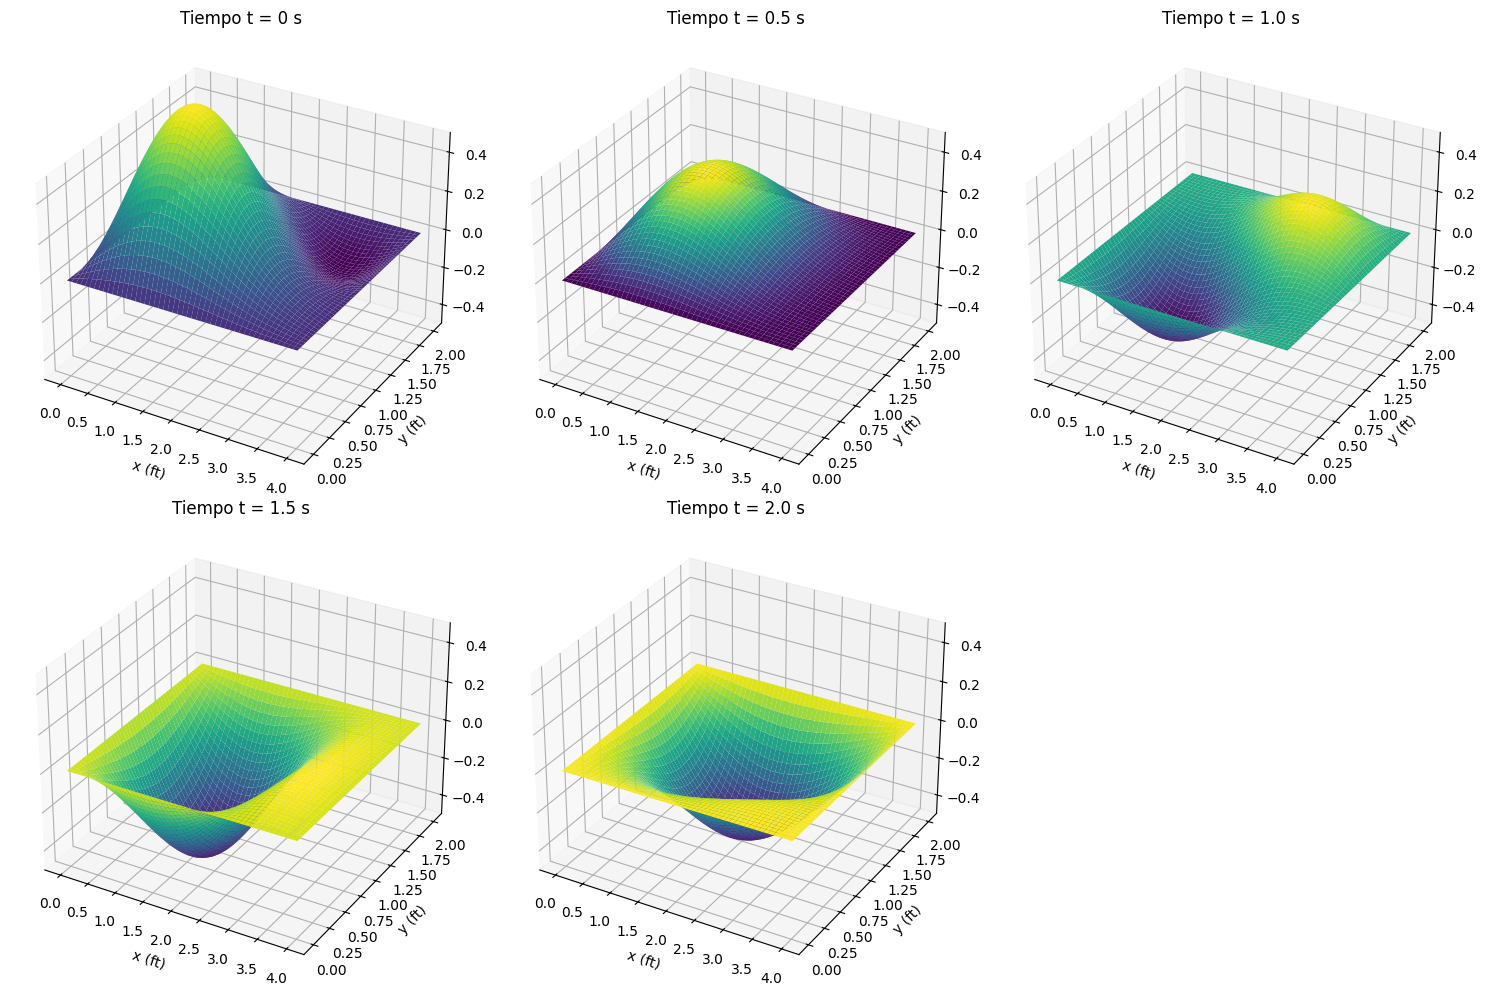

In [ ]:
plt.figure(figsize=(15, 10))
for i, t in enumerate(times):
    Z = np.array([[u(xi, yi, t) for xi in x] for yi in y])

    ax = plt.subplot(2, 3, i+1, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(f'Tiempo t = {t} s')
    ax.set_zlim(-0.5, 0.5)
    ax.set_xlabel('x (ft)')
    ax.set_ylabel('y (ft)')

plt.tight_layout()
plt.show()